Chi2: 36540.20270061387, p-value: 0.0, DOF: 295
Cramér's V: 0.1222829439760564
Reject H₀: Product category influences best-seller distribution.
Little to no association between product category and best-seller status.


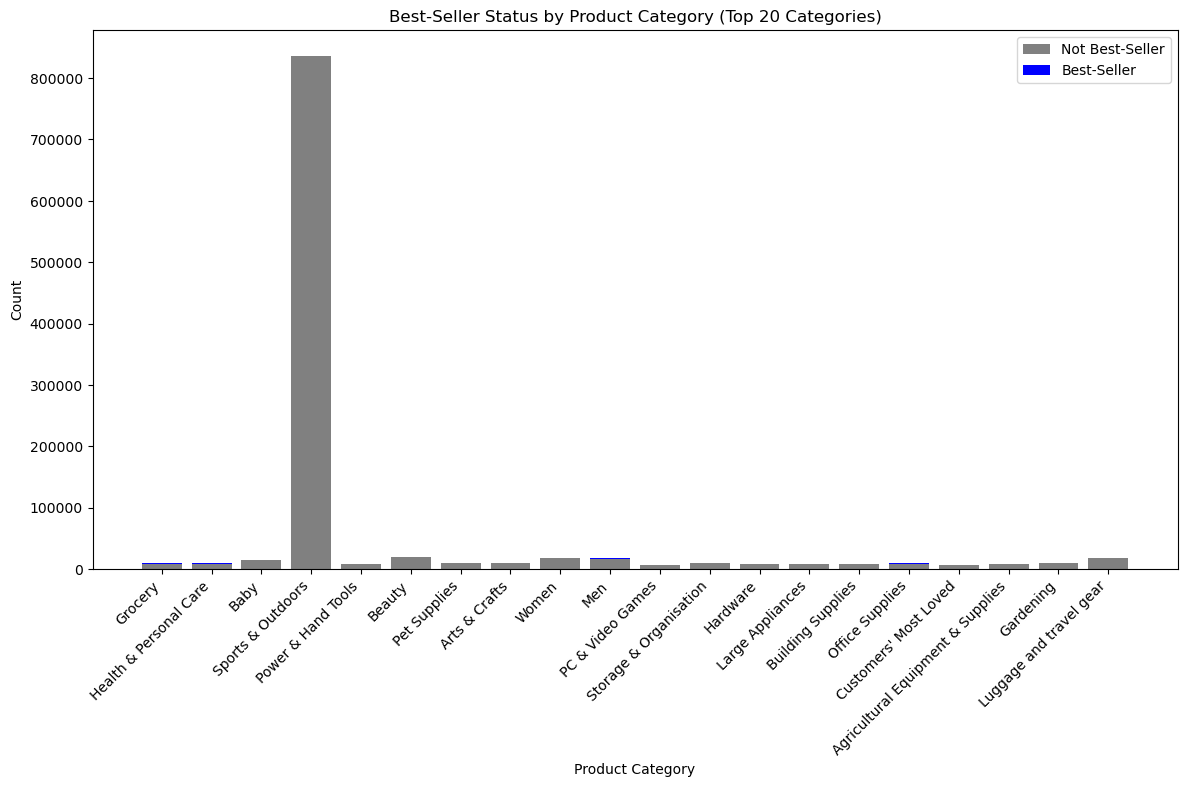

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,No,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,Yes,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,No,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,No,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,No,0,Hi-Fi Speakers


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv('/Users/cha/Documents/Ironhack2/UNIT_5/Labs/lab-eda-bivariate/amazon_dataset.csv')

df.to_csv("amazon_dataset.csv", index=False)

# Create a crosstab for best-sellers by category
df_bestsellers = pd.crosstab(df["category"], df["isBestSeller"])

# Chi-square test
alpha = 0.05  # Significance level

# Convert "No" and "Yes" columns to integers (if applicable)
df_bestsellers = df_bestsellers.astype(int)

# Get observed values
observed_values = df_bestsellers.values  

# Perform Chi-square test
chi2, p, dof, expected_values = chi2_contingency(observed_values)

# Interpret results
if p < alpha:
    result = "Reject H₀: Product category influences best-seller distribution."
else:
    result = "Fail to reject H₀: No significant evidence that product category affects best-seller status."

# Calculate Cramér's V for effect size
def cramers_v(chi2, n, k):
    return np.sqrt(chi2 / (n * (k - 1)))

n = np.sum(observed_values)  # Total observations
k = min(observed_values.shape)  # Smallest number of categories

cramers_v_value = cramers_v(chi2, n, k)

# Print results
print(f"Chi2: {chi2}, p-value: {p}, DOF: {dof}")
print(f"Cramér's V: {cramers_v_value}")
print(result)

# Interpret Cramér's V
if cramers_v_value >= 0.7:
    print("Strong association: Best-seller status highly depends on product category.")
elif cramers_v_value >= 0.35:
    print("Moderate association: Some categories are more likely to be best-sellers.")
else:
    print("Little to no association between product category and best-seller status.")

# Visualization: Best-Seller Status by Category
df_bestsellers_reset = df_bestsellers.reset_index()
df_sorted = df_bestsellers_reset.sort_values(by="Yes", ascending=False).head(20)  # Top 20 categories

plt.figure(figsize=(14, 7))
plt.bar(df_sorted["category"], df_sorted["No"], label="Not Best-Seller", color="gray")
plt.bar(df_sorted["category"], df_sorted["Yes"], bottom=df_sorted["No"], label="Best-Seller", color="blue")

plt.xticks(rotation=45, ha="right")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.title("Best-Seller Status by Product Category (Top 20 Categories)")
plt.legend()
plt.show()

# Outlier Detection using Tukey's IQR
def tukeys_test_outliers(data):    
    Q1 = data["price"].quantile(0.25)
    Q3 = data["price"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data["price"] < lower_bound) | (data["price"] > upper_bound)]
    
    return outliers

# Remove outliers
df_clean = df[~df.index.isin(tukeys_test_outliers(df).index)]

df_clean.head()
